# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [57]:
print(cities[0:5])

['codrington', 'bireun', 'grindavik', 'nuuk', 'vao']


In [59]:
len(cities)

590

In [4]:
# city_dict={
#     "City":cities
#     ""
# }

# city_df=pd.DataFrame(city_dict)
# city_df.head()

In [5]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
print(cities[0])

codrington


In [84]:
# # Test response on 1

# cities[0]
# # use api open weather map by city name 


# # 'api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}'
# base_url='http://api.openweathermap.org/data/2.5/weather?'
# # query_url=base_url+cities[0]+'&appid='+weather_api_key

# query_params={
#     'q': cities[0],
#     'units': 'imperial',
#     'appid': weather_api_key
    
# }
# # print(query_url)

# response=requests.get(base_url, params=query_params)

In [85]:
# response.url

'http://api.openweathermap.org/data/2.5/weather?q=codrington&units=imperial&appid=46e2e490bebf4766681f25fb005f7c97'

In [63]:
# data=response.json()
# pprint(data)

In [74]:
print(cities[0])

codrington


In [96]:
# need the following values: 
# City	 cities OR data['name'] # Lat	  # Lng	 # Max Temp	 # Humidity	 ->weather is a list # Cloudiness	
# Wind Speed	 # Country	data['sys']['country'] ->returns a country code 
# Date data['dt'] ->utc unix code stamp
lat_list=[]
long_list=[]
max_temp_list=[]
hum_list=[]
cloud_list=[]
wind_list=[]
country_list=[]
date_list=[]
set_count=1
index_count=0

base_url='http://api.openweathermap.org/data/2.5/weather?'

print("Beginning Data Retrieval")
print("---"*15)

for each_city in cities:
#     make a request
    print(f'Proccessing Record {index_count} of Set {set_count} | {each_city}')

    query_params={
    'q': each_city,
    'units': 'imperial',
    'appid': weather_api_key
    
    }

    response=requests.get(base_url, params=query_params)

#     put into json
    data=response.json()
#     traverse through json to pull this data
    try:
#         city_name=data['name']
        lat=data['coord']['lat']
        lng=data['coord']['lon']
        max_temp=data['main']['temp_max']
        hum=data['main']['humidity']
        cloud=data['clouds']['all']
        wind=data['wind']['speed']
        country=data['sys']['country']
        date=data['dt']
        
        
        lat_list.append(lat)
        long_list.append(lng)
        max_temp_list.append(max_temp)
        hum_list.append(hum)
        cloud_list.append(cloud)
        wind_list.append(wind)
        country_list.append(country)
        date_list.append(date)
        
    except:
        print(f'City not found. Skipping...')
        lat_list.append(np.nan)
        long_list.append(np.nan)
        max_temp_list.append(np.nan)
        hum_list.append(np.nan)
        cloud_list.append(np.nan)
        wind_list.append(np.nan)
        country_list.append(np.nan)
        date_list.append(np.nan)
    
    
    index_count=index_count+1
    
    if index_count > 50:
        index_count=0
        set_count=set_count+1
        
print("---"*15)
print("Data Retrieval Complete")
print("---"*15)

Beginning Data Retrieval
---------------------------------------------
Proccessing Record 0 of Set 1 | codrington
Proccessing Record 1 of Set 1 | bireun
Proccessing Record 2 of Set 1 | grindavik
Proccessing Record 3 of Set 1 | nuuk
Proccessing Record 4 of Set 1 | vao
Proccessing Record 5 of Set 1 | bambous virieux
Proccessing Record 6 of Set 1 | khatanga
Proccessing Record 7 of Set 1 | mataura
Proccessing Record 8 of Set 1 | taoudenni
Proccessing Record 9 of Set 1 | alofi
Proccessing Record 10 of Set 1 | hobart
Proccessing Record 11 of Set 1 | eureka
Proccessing Record 12 of Set 1 | nipawin
Proccessing Record 13 of Set 1 | busselton
Proccessing Record 14 of Set 1 | bogorodskoye
Proccessing Record 15 of Set 1 | jamestown
Proccessing Record 16 of Set 1 | lebu
Proccessing Record 17 of Set 1 | bredasdorp
Proccessing Record 18 of Set 1 | morro bay
Proccessing Record 19 of Set 1 | marsa matruh
Proccessing Record 20 of Set 1 | avarua
Proccessing Record 21 of Set 1 | kahului
Proccessing Record

Proccessing Record 34 of Set 4 | caramay
Proccessing Record 35 of Set 4 | arraial do cabo
Proccessing Record 36 of Set 4 | malwan
City not found. Skipping...
Proccessing Record 37 of Set 4 | bilma
Proccessing Record 38 of Set 4 | marawi
Proccessing Record 39 of Set 4 | kilindoni
Proccessing Record 40 of Set 4 | ballina
Proccessing Record 41 of Set 4 | maryborough
Proccessing Record 42 of Set 4 | snasa
Proccessing Record 43 of Set 4 | ruatoria
City not found. Skipping...
Proccessing Record 44 of Set 4 | sofiysk
City not found. Skipping...
Proccessing Record 45 of Set 4 | ambon
Proccessing Record 46 of Set 4 | saldanha
Proccessing Record 47 of Set 4 | tucuman
Proccessing Record 48 of Set 4 | beyneu
Proccessing Record 49 of Set 4 | ixtapa
Proccessing Record 50 of Set 4 | portland
Proccessing Record 0 of Set 5 | carnarvon
Proccessing Record 1 of Set 5 | novi ligure
Proccessing Record 2 of Set 5 | bozoum
Proccessing Record 3 of Set 5 | the valley
Proccessing Record 4 of Set 5 | pionerskiy
P

Proccessing Record 14 of Set 8 | meulaboh
Proccessing Record 15 of Set 8 | fort saint john
City not found. Skipping...
Proccessing Record 16 of Set 8 | aneho
Proccessing Record 17 of Set 8 | barawe
City not found. Skipping...
Proccessing Record 18 of Set 8 | bantou
Proccessing Record 19 of Set 8 | mandera
Proccessing Record 20 of Set 8 | tadine
Proccessing Record 21 of Set 8 | hobyo
Proccessing Record 22 of Set 8 | farsund
Proccessing Record 23 of Set 8 | jubayl
City not found. Skipping...
Proccessing Record 24 of Set 8 | oyama
Proccessing Record 25 of Set 8 | kruisfontein
Proccessing Record 26 of Set 8 | albert
Proccessing Record 27 of Set 8 | umm durman
City not found. Skipping...
Proccessing Record 28 of Set 8 | arnstadt
Proccessing Record 29 of Set 8 | tonantins
Proccessing Record 30 of Set 8 | greenfield
Proccessing Record 31 of Set 8 | etchoropo
Proccessing Record 32 of Set 8 | mapiripan
Proccessing Record 33 of Set 8 | jiangyou
Proccessing Record 34 of Set 8 | lermontovka
Procce

Proccessing Record 43 of Set 11 | havelock
Proccessing Record 44 of Set 11 | virginia beach
Proccessing Record 45 of Set 11 | gornozavodsk
Proccessing Record 46 of Set 11 | akyab
Proccessing Record 47 of Set 11 | santa ana
Proccessing Record 48 of Set 11 | kamenskoye
City not found. Skipping...
Proccessing Record 49 of Set 11 | kanniyakumari
Proccessing Record 50 of Set 11 | chapais
Proccessing Record 0 of Set 12 | catuday
Proccessing Record 1 of Set 12 | karlshamn
Proccessing Record 2 of Set 12 | micheweni
Proccessing Record 3 of Set 12 | santiago del estero
Proccessing Record 4 of Set 12 | taltal
Proccessing Record 5 of Set 12 | lasa
Proccessing Record 6 of Set 12 | nizwa
Proccessing Record 7 of Set 12 | turtkul
City not found. Skipping...
Proccessing Record 8 of Set 12 | peniche
Proccessing Record 9 of Set 12 | nemuro
Proccessing Record 10 of Set 12 | oga
Proccessing Record 11 of Set 12 | padang
Proccessing Record 12 of Set 12 | erzin
Proccessing Record 13 of Set 12 | kawakawa
Procc

In [87]:
response.url

'http://api.openweathermap.org/data/2.5/weather?q=bireun&units=imperial&appid=46e2e490bebf4766681f25fb005f7c97'

In [150]:
print(lat_list)

[-38.2667, 5.203, 63.8424, 64.1835, -22.6667, -20.3428, 71.9667, -46.1927, 22.6783, -19.0595, -42.8794, 40.8021, 53.3668, -33.65, 56.55, 42.097, -37.6167, -34.5322, 35.3658, 31.3525, -21.2078, 20.8947, 8.4054, -46.6, 65.282, -2.8856, 42.9709, -24.7911, 71.6872, -54.8, 49.7789, 18.9048, -0.9131, -34.4187, -25.2406, -42.7826, 38.421, -33.5906, 7.3167, -3.8004, 3.0707, -34.426, 60.9167, -17.2614, 54.7682, 64.3833, 46.1667, -53.15, 28.3667, 2.3, -33.9258, 42.7762, nan, 37.1041, nan, -7.2597, 4.9333, 71.2906, 47.5639, -20.0064, 60.8953, -43.3002, -0.6, -38.6533, -0.7393, 22.0752, 19.7297, 73.5069, 56.2267, 36.2083, 69.4541, 60.1432, 54.0359, -9.8, -21.2, 52.6333, -22.45, nan, 14.8961, -15.7504, -32.035, 10.9995, 70.8578, 11.6667, 15.8667, -23.5333, 77.484, 71.9167, 38.5167, -35.9671, 63.1906, -33.918, 6.3654, 64.8569, 62.456, 34.6391, 69.4865, -17.7125, 63.7506, -34.5703, 8.2, nan, -5.1989, 42.0304, 22.8909, 42.6191, 50.06, 21.3469, 36.6177, 40.5982, 59.7035, 42.6001, -28.7667, -36.7167, -9

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
# create df
city_dict={
    "City": cities,
    "Lat":lat_list,
    "Lng":long_list,
    "Max Temp": max_temp_list,
    "Humidity": hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": wind_list,
    "Country": country_list,
    "Date": date_list
    
}

city_data_df=pd.DataFrame(city_dict)

In [118]:
# pd.set_option('display.float_format', lambda x: f"{x:.2f}")

In [124]:
# pd.reset_option(pat="all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [127]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,55.00,68.0,61.0,12.68,AU,1.611678e+09
1,bireun,5.2030,96.7009,77.52,83.0,98.0,4.18,ID,1.611678e+09
2,grindavik,63.8424,-22.4338,26.60,54.0,0.0,21.85,IS,1.611678e+09
3,nuuk,64.1835,-51.7216,21.20,73.0,75.0,9.22,GL,1.611678e+09
4,vao,-22.6667,167.4833,76.73,75.0,78.0,19.64,NC,1.611678e+09
5,bambous virieux,-20.3428,57.7575,80.60,65.0,20.0,3.65,MU,1.611678e+09
6,khatanga,71.9667,102.5000,-23.93,84.0,95.0,6.67,RU,1.611678e+09
7,mataura,-46.1927,168.8643,70.00,53.0,100.0,11.01,NZ,1.611678e+09
8,taoudenni,22.6783,-3.9836,89.08,11.0,0.0,14.92,ML,1.611678e+09
9,alofi,-19.0595,-169.9187,71.60,100.0,100.0,8.05,NU,1.611678e+09


In [128]:
city_data_df.to_csv(output_data_file)

In [151]:
city_data_df.loc[49:55,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
49,sibu,2.3000,111.8167,75.20,100.0,40.0,1.57,MY,1.611679e+09
50,cape town,-33.9258,18.4232,72.00,64.0,20.0,27.63,ZA,1.611678e+09
51,muros,42.7762,-9.0603,59.00,95.0,100.0,3.00,ES,1.611679e+09
52,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,saint george,37.1041,-113.5841,33.01,69.0,20.0,8.05,US,1.611678e+09
54,barentsburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,conde,-7.2597,-34.9075,87.80,55.0,20.0,13.80,BR,1.611679e+09


In [157]:
city_data_df.count

<bound method DataFrame.count of                       City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0               codrington -38.2667  141.9667     55.00      68.0        61.0   
1                   bireun   5.2030   96.7009     77.52      83.0        98.0   
2                grindavik  63.8424  -22.4338     26.60      54.0         0.0   
3                     nuuk  64.1835  -51.7216     21.20      73.0        75.0   
4                      vao -22.6667  167.4833     76.73      75.0        78.0   
..                     ...      ...       ...       ...       ...         ...   
585                 hihifo      NaN       NaN       NaN       NaN         NaN   
586                sakakah  29.9697   40.2064     57.20      23.0         0.0   
587  mayor pablo lagerenza -19.9309  -60.7718     89.38      45.0        76.0   
588          traverse city  44.7631  -85.6206     26.60      74.0        90.0   
589            robertsport   6.7533  -11.3686     81.79      72.0         0.

In [133]:
display(city_data_df.describe())

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.965408,14.795495,51.545908,71.361468,56.521101,8.687028,1.611678e+09
std,32.619815,89.625104,33.925459,20.943367,39.205811,6.312122,9.816265e+01
min,-54.800000,-175.200000,-54.060000,8.000000,0.000000,0.430000,1.611678e+09
25%,-4.850000,-65.102300,32.000000,61.000000,18.000000,3.650000,1.611678e+09
50%,22.276900,18.966700,62.530000,76.000000,75.000000,7.110000,1.611679e+09
75%,46.863300,95.100000,78.580000,86.000000,93.000000,11.500000,1.611679e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,35.680000,1.611679e+09


In [144]:
type(city_data_df)

pandas.core.frame.DataFrame

In [158]:
clean_city_df=city_data_df.dropna()

In [159]:
clean_city_df.count

<bound method DataFrame.count of                       City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0               codrington -38.2667  141.9667     55.00      68.0        61.0   
1                   bireun   5.2030   96.7009     77.52      83.0        98.0   
2                grindavik  63.8424  -22.4338     26.60      54.0         0.0   
3                     nuuk  64.1835  -51.7216     21.20      73.0        75.0   
4                      vao -22.6667  167.4833     76.73      75.0        78.0   
..                     ...      ...       ...       ...       ...         ...   
584      sao joao da barra -21.6403  -41.0511     89.60      45.0         0.0   
586                sakakah  29.9697   40.2064     57.20      23.0         0.0   
587  mayor pablo lagerenza -19.9309  -60.7718     89.38      45.0        76.0   
588          traverse city  44.7631  -85.6206     26.60      74.0        90.0   
589            robertsport   6.7533  -11.3686     81.79      72.0         0.

In [160]:
display(clean_city_df.describe())

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.965408,14.795495,51.545908,71.361468,56.521101,8.687028,1.611678e+09
std,32.619815,89.625104,33.925459,20.943367,39.205811,6.312122,9.816265e+01
min,-54.800000,-175.200000,-54.060000,8.000000,0.000000,0.430000,1.611678e+09
25%,-4.850000,-65.102300,32.000000,61.000000,18.000000,3.650000,1.611678e+09
50%,22.276900,18.966700,62.530000,76.000000,75.000000,7.110000,1.611679e+09
75%,46.863300,95.100000,78.580000,86.000000,93.000000,11.500000,1.611679e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,35.680000,1.611679e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [138]:
# Checked, returns 0. Skip step
city_data_df.head()
hum_filter=city_data_df['Humidity']>100
high_hum_df=city_data_df.loc[hum_filter,:]
high_hum_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# no cities

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [175]:
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,55.00,68.0,61.0,12.68,AU,1.611678e+09
1,bireun,5.2030,96.7009,77.52,83.0,98.0,4.18,ID,1.611678e+09
2,grindavik,63.8424,-22.4338,26.60,54.0,0.0,21.85,IS,1.611678e+09
3,nuuk,64.1835,-51.7216,21.20,73.0,75.0,9.22,GL,1.611678e+09
4,vao,-22.6667,167.4833,76.73,75.0,78.0,19.64,NC,1.611678e+09


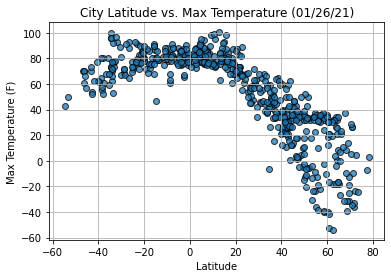

As latitude changes, max temperature changes


In [176]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Max Temp']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Max Temperature (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
print(f'As latitude changes, max temperature changes')

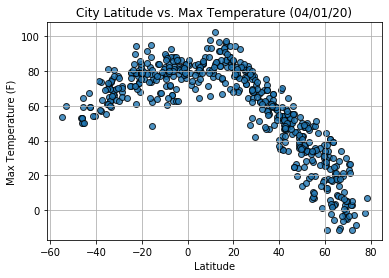

## Latitude vs. Humidity Plot

In [177]:
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,55.00,68.0,61.0,12.68,AU,1.611678e+09
1,bireun,5.2030,96.7009,77.52,83.0,98.0,4.18,ID,1.611678e+09
2,grindavik,63.8424,-22.4338,26.60,54.0,0.0,21.85,IS,1.611678e+09
3,nuuk,64.1835,-51.7216,21.20,73.0,75.0,9.22,GL,1.611678e+09
4,vao,-22.6667,167.4833,76.73,75.0,78.0,19.64,NC,1.611678e+09


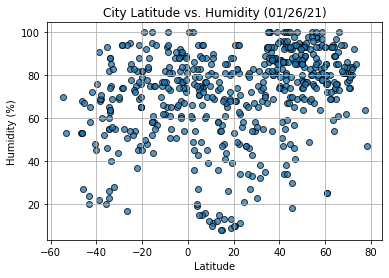

As latitude changes, humidity changes


In [179]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Humidity']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print(f'As latitude changes, humidity changes')

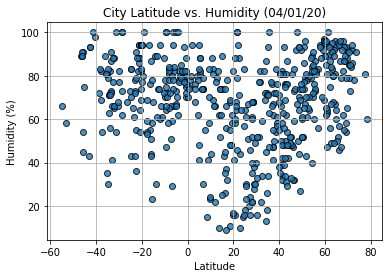

## Latitude vs. Cloudiness Plot

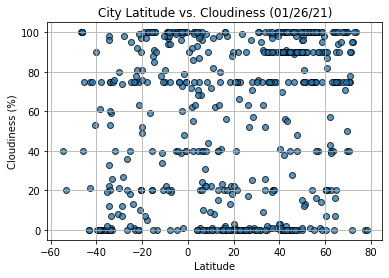

As latitude changes, cloudiness changes


In [180]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Cloudiness']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print(f'As latitude changes, cloudiness changes')

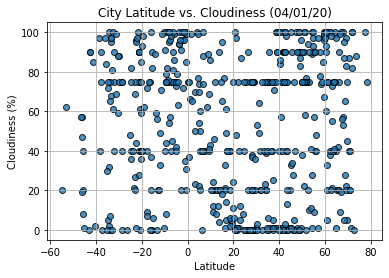

## Latitude vs. Wind Speed Plot

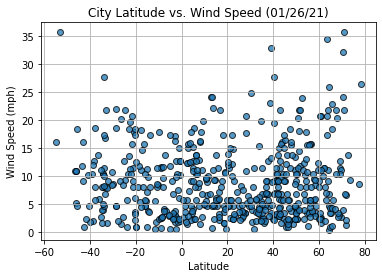

As latitude changes, wind speed changes


In [181]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Wind Speed']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f'As latitude changes, wind speed changes')

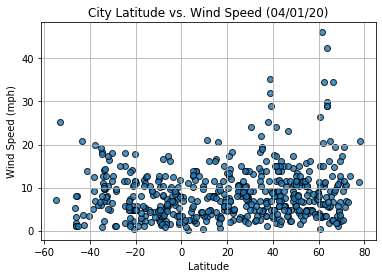

## Linear Regression

In [196]:
# get northern hemisphere values using filter
north_filter=clean_city_df['Lat']>=0
north_values=clean_city_df.loc[north_filter,'Lat']
display(len(north_values))


south_filter=clean_city_df['Lat']<0
south_values=clean_city_df.loc[south_filter,'Lat']
display(len(south_values))

382

163

In [200]:
import scipy.stats as sts

The r-value is -0.8588397765374678


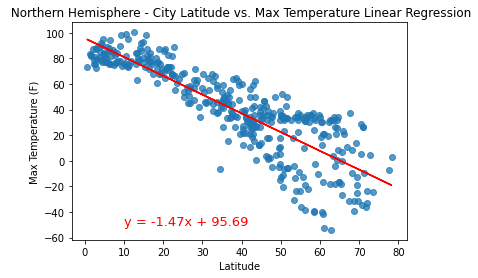

In [211]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Max Temp']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, -50),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


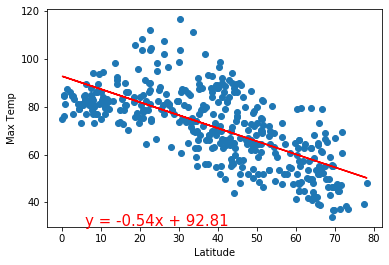

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.4280441700216304


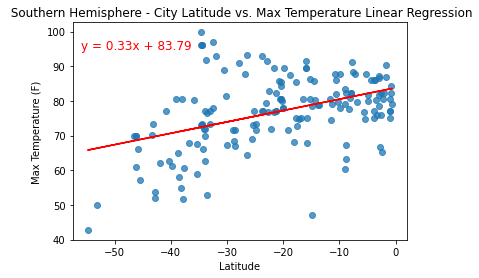

In [222]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Max Temp']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-56,95),fontsize=12,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.6082708688906918


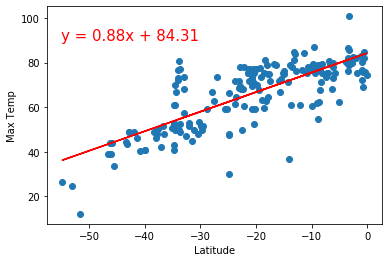

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.37489551556015704


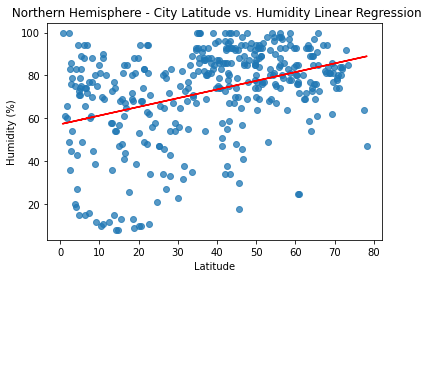

In [223]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Humidity']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, -50),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.000543987878808455


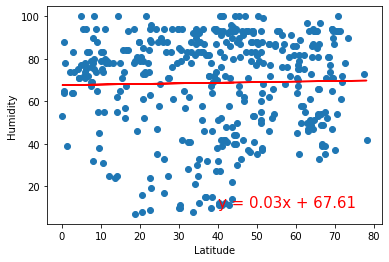

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.38885257222433756


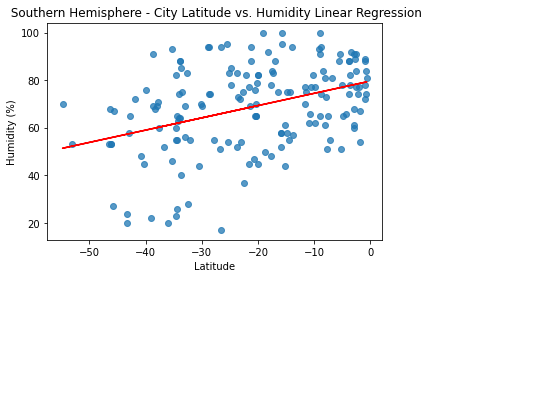

In [225]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Humidity']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, -50),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.014985174297345524


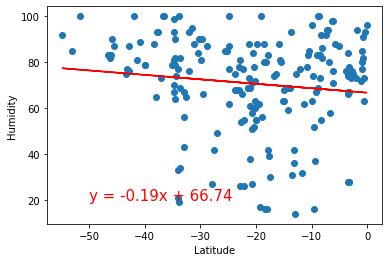

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2402208664958611


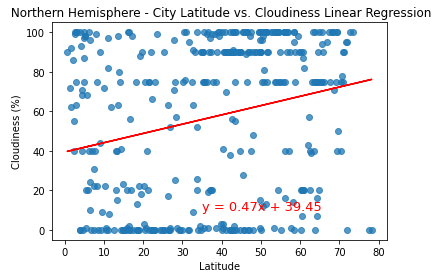

In [228]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Cloudiness']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(35, 10),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.0020898727664228514


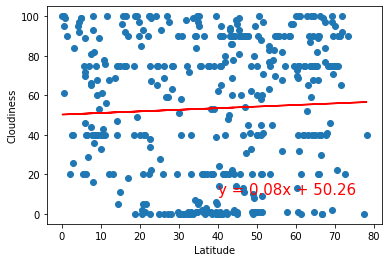

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.34764737160043135


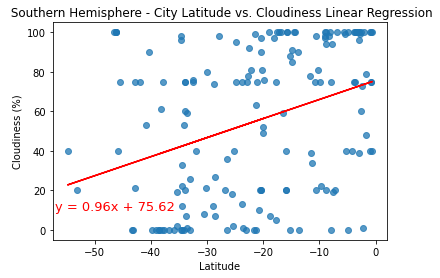

In [232]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Cloudiness']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-57, 10),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.0035263772085582894


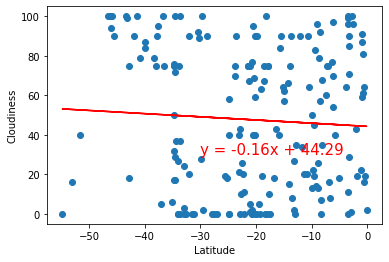

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.09516776613431095


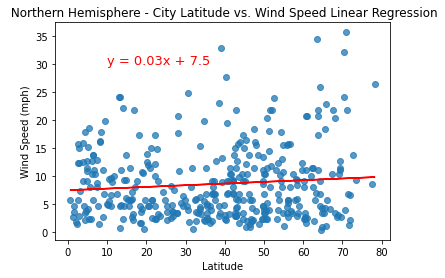

In [234]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Wind Speed']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 30),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.04019723576144484


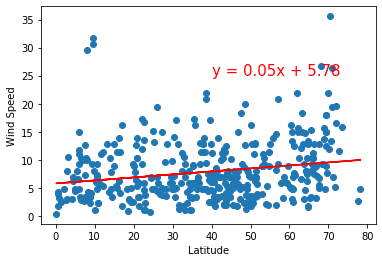

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.23535082549206943


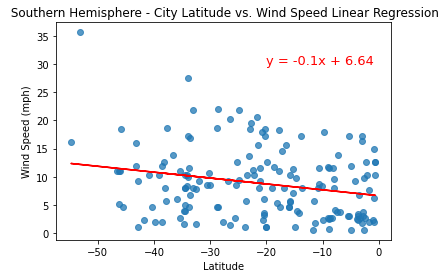

In [237]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Wind Speed']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20, 30),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.show()

The r-value is: 0.017128274759839232


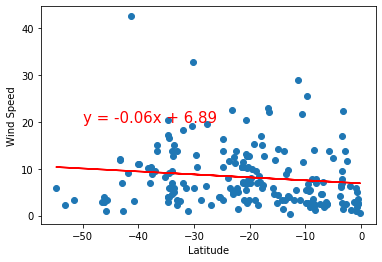